# install dependencies

In [ ]:
!pip3 install inverse-canopy==0.0.14

# **Model Inputs**

In [ ]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 17.4799398605560050, performing 22.3 it/sec
Step 100: Loss = 3.9027865871016565, performing 467.2 it/sec
Step 200: Loss = 0.0611916767928204, performing 478.7 it/sec
No improvement since Step 249, early stopping.
[Best]  Step 248: Loss = 0.0037971567190745
[Final] Step 298: Loss = 0.0041057274486128

predicted end states
------------------------------------
         5th       Mean      95th
SDFR-0  9.96e-01  9.96e-01  9.96e-01
SDFR-1  4.19e-03  4.19e-03  4.19e-03
SDFR-2  4.30e-05  4.30e-05  4.30e-05
SDFR-3  6.01e-09  6.01e-09  6.01e-09
SDFR-4  2.16e-05  2.16e-05  2.16e-05
SDFR-5  1.90e-05  1.90e-05  1.90e-05
SDFR-6  2.14e-06  2.14e-06  2.14e-06
SDFR-7  1.70e-08  1.70e-08  1.70e-08
SDFR-8  4.23e-09  4.23e-09  4.23e-09


predicted conditional events
----------------------------------------
             5th       Mean      95th
SDFR  

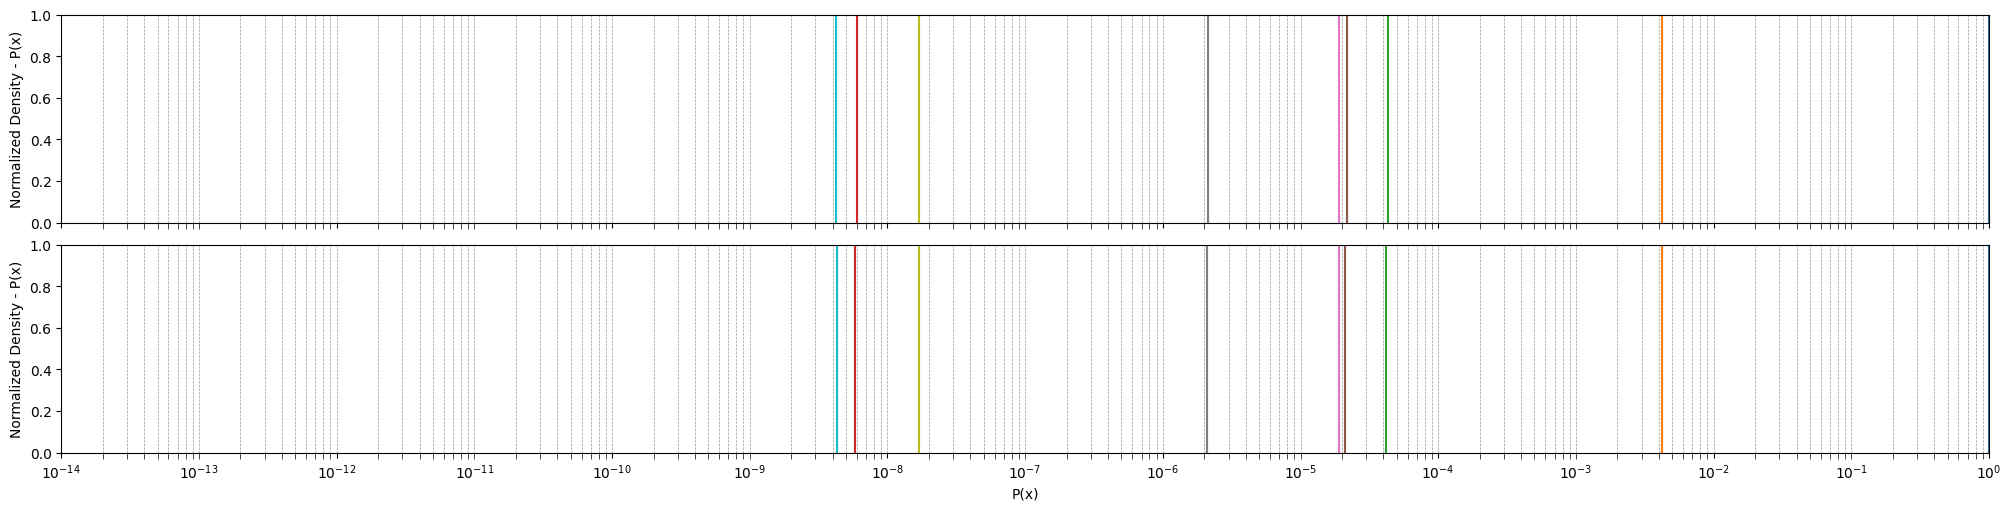

In [ ]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 5.0e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['SDFR      ', 'LMFD      ', 'RFIR      ', 'LLRF      ', 'SSSD|~LLRF', 'SSSD|LLRF ', 'SYSO|~LLRF', 'SYSO|LLRF '],  # Assuming names based on the sequences
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'SDFR-1': {
        'sequence': [1, 0, 0, 0, 0, np.nan, np.nan, np.nan],
        'probability': 4.2e-3,
    },
    'SDFR-2': {
        'sequence': [1, 0, 0, 0, 1, np.nan, 0, np.nan]  ,
        'probability': 4.2e-5,
    },
    'SDFR-3': {
        'sequence': [1, 0, 0, 0, 1, np.nan, 1, np.nan],
        'probability': 5.8e-9,
    },
    'SDFR-4': {
        'sequence': [1, 0, 0, 1, np.nan, 0, np.nan, np.nan],
        'probability': 2.1e-5,
    },
    'SDFR-5': {
        'sequence': [1, 0, 0, 1, np.nan, 1, np.nan, 0],
        'probability': 1.9e-5,
    },
    'SDFR-6': {
        'sequence': [1, 0, 0, 1, np.nan, 1, np.nan, 1],
        'probability': 2.1e-6,
    },
    'SDFR-7': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.7e-8,
    },
    'SDFR-8': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.3e-9,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)